ar# DeepBLU-Z model testing

Here we will import some fish images and use them to test our trained DeepBLU-Z models.

The hdf5 dataset images_ds.h5 contains 59,835 labeled
images and 2388 unlabeled images for verifying models after training for a total of 62223 images. The
2388 unlabeled images are not used during training and are intended for post-hoc validation like this.

First, let's read in some images and look at the data:

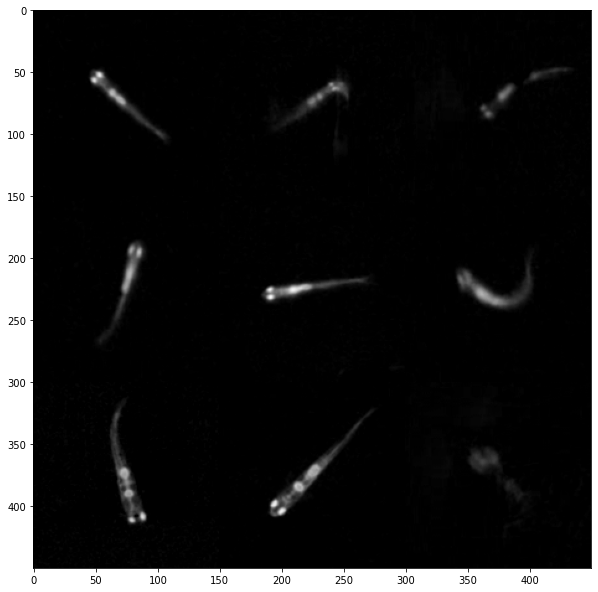

In [13]:
# Import database of images
import h5py
# hdf_path = '../data/training_data/images_ds.h5'
hdf_path = '../data/danionella_training_data/images_ds.h5'
hdf_file = h5py.File(hdf_path, 'r')
for gname, group in hdf_file.items():
    for dname, ds in group.items():
        images = ds

# Pull out nine random images from set held out during training and display
import numpy as np
# unlabeled_indices = np.linspace(59836, 62223, 62223-59835, dtype=int)
unlabeled_indices = np.linspace(0, 499, 500, dtype=int)
# unlabeled_indices = np.linspace(0, 60000-1, 60000, dtype=int)

import random
image_indices = random.sample(list(unlabeled_indices), 9)
image_indices.sort()

import matplotlib.pyplot as plt
from skimage.util import montage

images = images[image_indices[:], :, :]
images = np.transpose(images, (0, 2, 1))

plt.rcParams["figure.figsize"] = (10,20)
plt.imshow(montage(images), cmap='gray')

Now let's run these images through one of our models for pose estimation and display the results:

In [14]:
%%capture

from PIL import Image
import copy

tracked_images = copy.deepcopy(images)
for im_num in range(images.shape[0]):
    image = Image.fromarray(images[im_num, :, :])
    image.save('../data/test_data/temp.tif')
    ! python3 ../main.py -m predict --load ../models/091720/resnet18_danionella_retrain/resnet18 -t ../data/test_data/temp.tif
    # ! python3 ../main.py -m predict --load ../models/091620/resnet18_50e/resnet18 -t ../data/test_data/temp.tif
    tracked_images[im_num, :, :] = Image.open('../data/test_data/temp_tracked.tif')

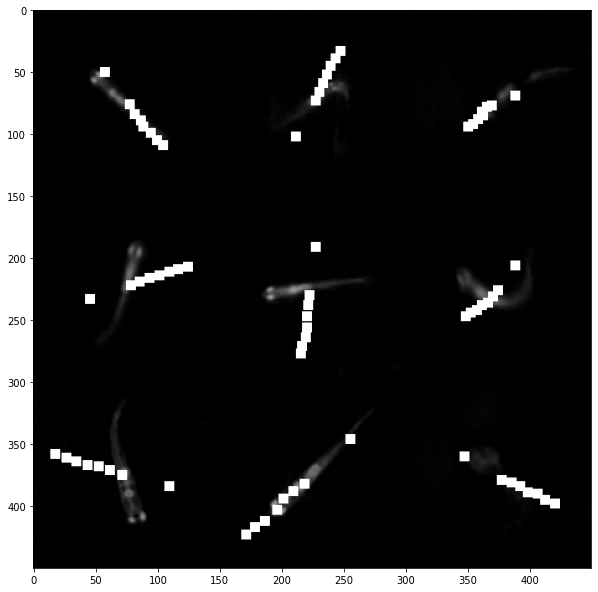

In [15]:
plt.rcParams["figure.figsize"] = (10,20)
plt.imshow(montage(tracked_images), cmap='gray')

Test running on stack

In [16]:
#Import database of images
# import numpy as np
# import h5py
# hdf_path = '../data/training_data/images_ds.h5'
# # hdf_path = '/home/userman/Documents/aws/danionella_training_data/images_ds.h5'
# hdf_file = h5py.File(hdf_path, 'r')
# for gname, group in hdf_file.items():
#     for dname, ds in group.items():
#         images = ds
#
# stack = np.uint8(images[50000:50500, :,  :])
# stack = np.transpose(stack, (0, 2, 1))
#
# import imageio
#
# imageio.mimwrite('../data/test_data/test_stack4.tiff', stack)

In [17]:
# %%capture
#
# ! python3 ../main.py -m predict --load ../models/090920/resnet18_50e2x/resnet18 -t ../data/test_data/image16.tif

In [22]:
np.linspace(0.2, 2, 49)

array([0.2   , 0.2375, 0.275 , 0.3125, 0.35  , 0.3875, 0.425 , 0.4625,
       0.5   , 0.5375, 0.575 , 0.6125, 0.65  , 0.6875, 0.725 , 0.7625,
       0.8   , 0.8375, 0.875 , 0.9125, 0.95  , 0.9875, 1.025 , 1.0625,
       1.1   , 1.1375, 1.175 , 1.2125, 1.25  , 1.2875, 1.325 , 1.3625,
       1.4   , 1.4375, 1.475 , 1.5125, 1.55  , 1.5875, 1.625 , 1.6625,
       1.7   , 1.7375, 1.775 , 1.8125, 1.85  , 1.8875, 1.925 , 1.9625,
       2.    ])